# **<div style="text-align: center; color: black; font-size: 30px;">Data Dashboard and Report </div>**

In [39]:
import pandas as pd  
# loading the data from csv file to a Pandas DataFrame
data = pd.read_csv(r"C:\Users\vinuv\Downloads\Sample Data 2 (2) (1) (1).xls - Sales data.csv")
data.head()

,User ID,Product Code,Payment Status,Coupon code,Lead Registered Time,Sales Date,Source,Product Amount with GST,Payment Mode,Currency Code,Transaction Bank
0,user1,Product1,Initiated,NaN,"Aug 1, 2022 04:55 am","Jul 31, 2022",Direct,3999.0,NaN,INR,NaN
1,user2,Product2,Initiated,NaN,"Aug 1, 2022 04:46 am","Jul 31, 2022",Direct,999.0,NaN,INR,NaN
2,user4,Product3,Initiated,NaN,"Aug 1, 2022 03:21 am","Jul 31, 2022",Direct,1999.0,NaN,INR,NaN
3,user6,Product3,Initiated,NaN,"Aug 1, 2022 12:56 am","Jul 31, 2022",Direct,1999.0,NaN,INR,NaN
4,user8,Product4,Initiated,NaN,"Aug 1, 2022 12:46 am","Jul 31, 2022",Direct,2022.0,NaN,INR,NaN


In [40]:
# getting more information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9514 entries, 0 to 9513
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User ID                  9514 non-null   object 
 1   Product Code             9514 non-null   object 
 2   Payment Status           9514 non-null   object 
 3   Coupon code              662 non-null    object 
 4   Lead Registered Time     9514 non-null   object 
 5   Sales Date               9514 non-null   object 
 6   Source                   9514 non-null   object 
 7   Product Amount with GST  9513 non-null   float64
 8   Payment Mode             1730 non-null   object 
 9   Currency  Code           9514 non-null   object 
 10  Transaction Bank         92 non-null     object 
dtypes: float64(1), object(10)
memory usage: 817.7+ KB


In [41]:
# checking the missing values in each column
data.isnull().sum()

User ID                       0
Product Code                  0
Payment Status                0
Coupon code                8852
Lead Registered Time          0
Sales Date                    0
Source                        0
Product Amount with GST       1
Payment Mode               7784
Currency  Code                0
Transaction Bank           9422
dtype: int64

In [42]:
# Drop column with almost all nulls
data = data.drop(columns=['Transaction Bank'])

# Handle Coupon code (replace NaN with "No Coupon")
data['Coupon code'] = data['Coupon code'].fillna("No Coupon")

# Handle Payment Mode (replace NaN with "Unknown")
data['Payment Mode'] = data['Payment Mode'].fillna("Unknown")

# Handle Product Amount with GST (only 1 missing)
data['Product Amount with GST'] = data['Product Amount with GST'].fillna(data['Product Amount with GST'].median())


In [43]:
data.isnull().sum()

User ID                    0
Product Code               0
Payment Status             0
Coupon code                0
Lead Registered Time       0
Sales Date                 0
Source                     0
Product Amount with GST    0
Payment Mode               0
Currency  Code             0
dtype: int64

In [44]:
# number of rows and columns in the data frame
data.shape

(9514, 10)

In [45]:
# getting some statistical measures about the data
data.describe()

,Product Amount with GST
count,9514.000000
mean,1464.986109
std,1277.468282
min,4.680000
25%,499.000000
50%,1499.000000
75%,1999.000000
max,29992.000000


In [46]:
# Count the total number of duplicate rows in the dataset.
data.duplicated().sum()
data =  data.drop_duplicates()

In [47]:
# Quick stats
print("\nDate Range:", data['Sales Date'].min(), "to", data['Sales Date'].max())
print("Unique Users:", data['User ID'].nunique())
print("Unique Products:", data['Product Code'].nunique())
print("Unique Sources:", data['Source'].nunique())
print("Unique Currencies:", data['Currency  Code'].unique())
print("Payment Status Counts:\n", data['Payment Status'].value_counts())


Date Range: Jul 1, 2022 to Jun 9, 2022
Unique Users: 5885
Unique Products: 141
Unique Sources: 4
Unique Currencies: ['INR' 'USD']
Payment Status Counts:
 Payment Status
Initiated    7175
paid         1691
refund         41
Name: count, dtype: int64


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")   # hide warnings

# Convert date columns
data['Sales Date'] = pd.to_datetime(data['Sales Date'], errors='coerce')
data['Lead Registered Time'] = pd.to_datetime(data['Lead Registered Time'], errors='coerce')

# Filter only successful sales
paid_data = data[data['Payment Status'].str.lower() == 'paid']



In [49]:
# 1. Overall Sales Snapshot
total_revenue = paid_data['Product Amount with GST'].sum()
total_orders = paid_data.shape[0]
unique_customers = paid_data['User ID'].nunique()
avg_order_value = paid_data['Product Amount with GST'].mean()

print("📌 Total Revenue:", round(total_revenue,2))
print("📌 Total Paid Orders:", total_orders)
print("📌 Unique Paying Customers:", unique_customers)
print("📌 Average Order Value (AOV):", round(avg_order_value,2))


📌 Total Revenue: 2214212.86
📌 Total Paid Orders: 1691
📌 Unique Paying Customers: 1509
📌 Average Order Value (AOV): 1309.41


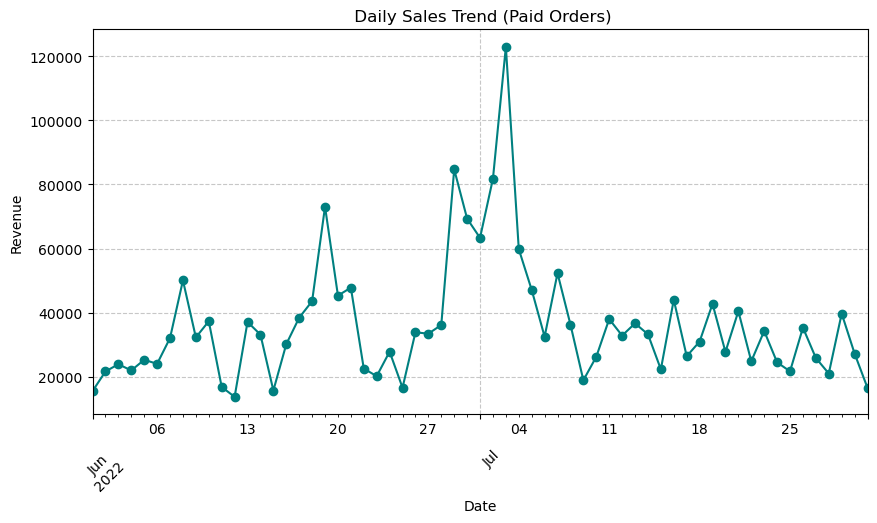

In [50]:
# 2. Daily Sales Trend
daily_sales = paid_data.groupby('Sales Date')['Product Amount with GST'].sum()

plt.figure(figsize=(10,5))
daily_sales.plot(kind='line', marker='o', color='teal')
plt.title(" Daily Sales Trend (Paid Orders)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


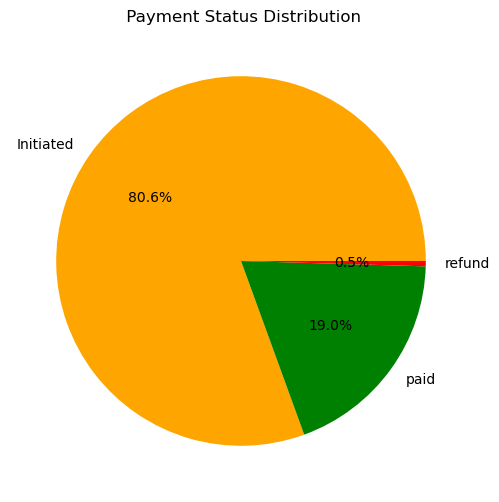

In [51]:
# 3. Payment Status Breakdown
plt.figure(figsize=(6,6))
data['Payment Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange','green','red'])
plt.title(" Payment Status Distribution")
plt.ylabel("")
plt.show()


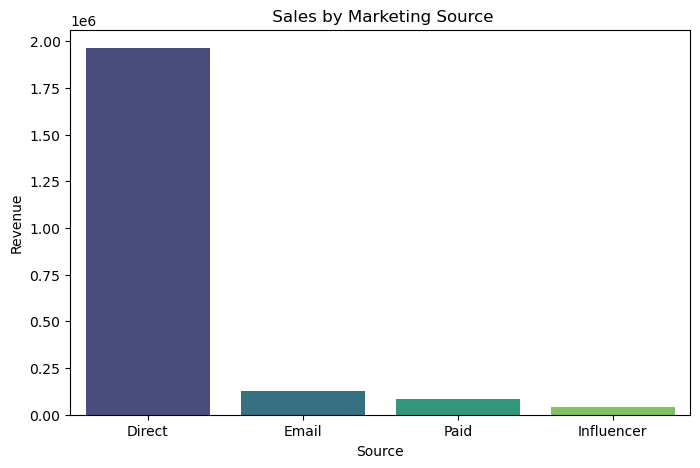

In [52]:
# 4. Sales by Source
source_sales = paid_data.groupby('Source')['Product Amount with GST'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=source_sales.index, y=source_sales.values, palette="viridis")
plt.title(" Sales by Marketing Source")
plt.ylabel("Revenue")
plt.xlabel("Source")
plt.show()

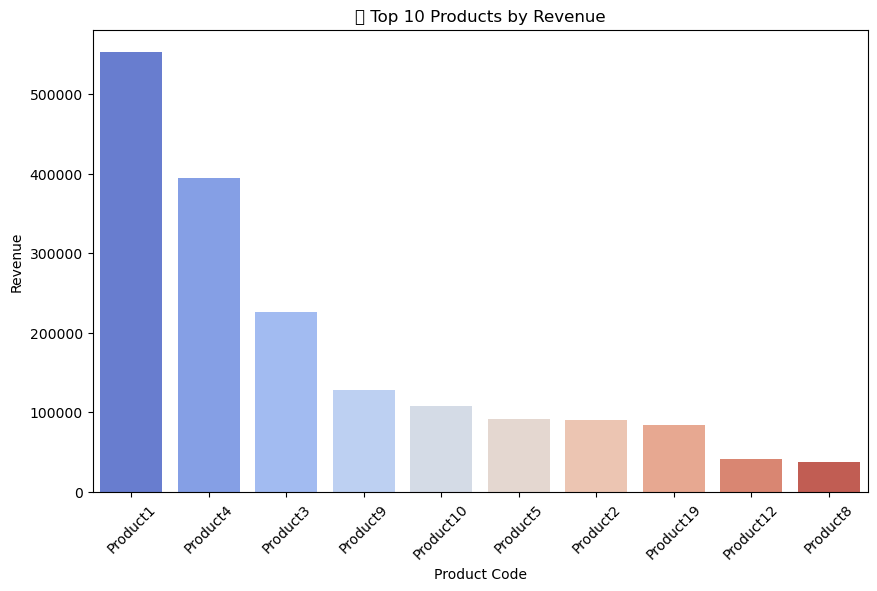

In [53]:
# 5. Top 10 Products
top_products = paid_data.groupby('Product Code')['Product Amount with GST'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y=top_products.values, palette="coolwarm")
plt.title("🏆 Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Product Code")
plt.xticks(rotation=45)
plt.show()

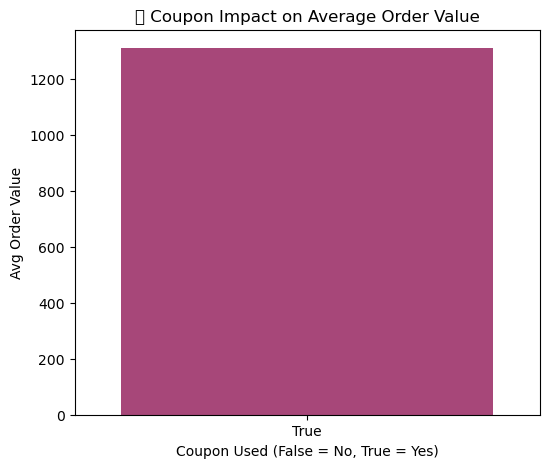

In [54]:
# 6. Coupon Impact
coupon_data = paid_data.copy()
coupon_data['Coupon Used'] = coupon_data['Coupon code'].notnull()

avg_sales_coupon = coupon_data.groupby('Coupon Used')['Product Amount with GST'].mean()

plt.figure(figsize=(6,5))
sns.barplot(x=avg_sales_coupon.index, y=avg_sales_coupon.values, palette="magma")
plt.title("🎟 Coupon Impact on Average Order Value")
plt.ylabel("Avg Order Value")
plt.xlabel("Coupon Used (False = No, True = Yes)")
plt.show()

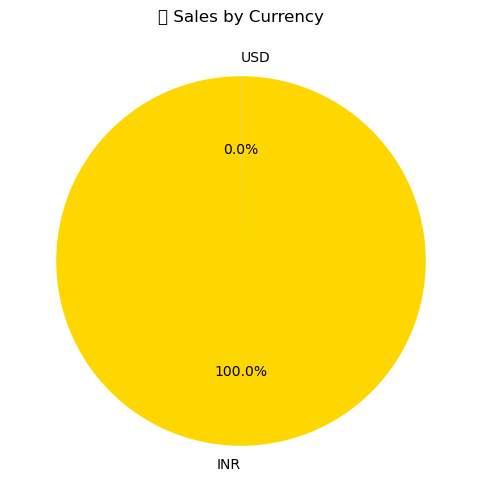

In [55]:
# 7. Currency Split
currency_split = paid_data.groupby('Currency  Code')['Product Amount with GST'].sum()

plt.figure(figsize=(6,6))
currency_split.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold','skyblue'])
plt.title("🌍 Sales by Currency")
plt.ylabel("")
plt.show()